In [24]:
from get_dataset import IMU_dataset
from get_dataset import Sequence_data
from model import LSTM_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import os
import numpy as np

In [25]:
frame_len = 30

In [26]:
dataset_dir = 'dataset'
data = IMU_dataset(dataset_dir)[:]

x_data = Sequence_data(data[0], frame_len)
y_data = [0] * len(x_data)
x_data = np.array(x_data)
y_data = np.array(y_data)
y_data = to_categorical(y_data, num_classes=2)
print(np.shape(x_data), np.shape(y_data))

(687, 30, 3) (687, 2)


In [27]:
num_degree = 3
num_pose = len(os.listdir('./dataset'))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            17408     
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 257,138
Trainable params: 257,138
Non-tr

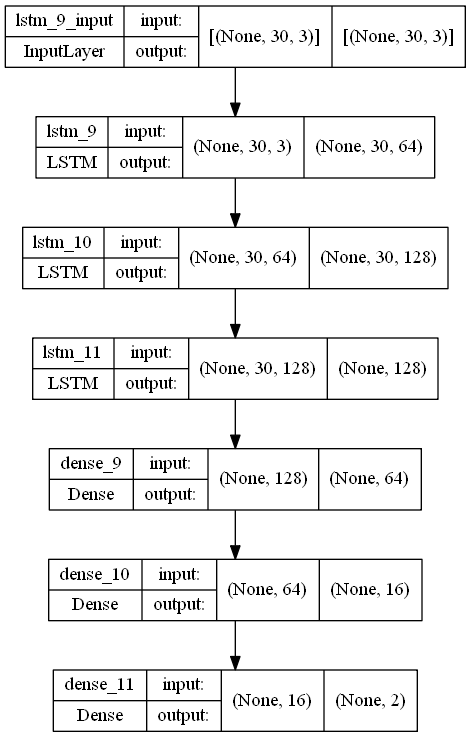

In [28]:
model = LSTM_model(num_degree, num_pose)
model.summary()
plot_model(model, show_shapes=True)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [30]:
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

In [31]:
history = model.fit(
    x_data, y_data, epochs=50)

Epoch 1/50
22/22 [==============================] - 6s 107ms/step - loss: 0.2543 - acc: 0.9985
Epoch 2/50
22/22 [==============================] - 2s 106ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 3/50
22/22 [==============================] - 2s 106ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 4/50
22/22 [==============================] - 2s 107ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 5/50
22/22 [==============================] - 2s 105ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 6/50
22/22 [==============================] - 2s 103ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 7/50
22/22 [==============================] - 2s 105ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 8/50
22/22 [==============================] - 2s 107ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 9/50
22/22 [==============================] - 2s 109ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 10/50
22/22 [==============================] - 2s 111ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 11/50
2